In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import path

import requests


from sklearn.model_selection import train_test_split

from acquire import acquire_all_heb_sales
from prepare import prep_heb_data


In [2]:
df = acquire_all_heb_sales()

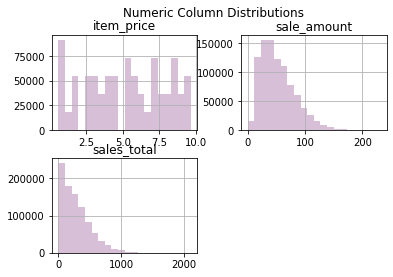

In [3]:
df = prep_heb_data(df)

1. split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [13]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

In [16]:
train = df[:'2016']
test = df['2017':]

In [20]:
train.shape, train.index.min(), train.index.max()

((730500, 16),
 Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2016-12-31 00:00:00+0000', tz='GMT'))

In [21]:
test.shape, test.index.min(), test.index.max()

((182500, 16),
 Timestamp('2017-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

2. Validate your splits by plotting X_train and y_train.

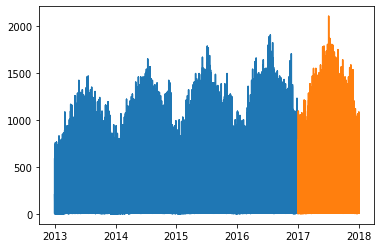

In [32]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

In [34]:
train.sales_total.resample('W').mean()

sale_date
2013-01-06 00:00:00+00:00    163.589167
2013-01-13 00:00:00+00:00    159.981203
2013-01-20 00:00:00+00:00    157.946720
2013-01-27 00:00:00+00:00    158.545383
2013-02-03 00:00:00+00:00    167.585014
                                ...    
2016-12-04 00:00:00+00:00    263.768997
2016-12-11 00:00:00+00:00    228.559894
2016-12-18 00:00:00+00:00    229.298643
2016-12-25 00:00:00+00:00    229.231000
2017-01-01 00:00:00+00:00    220.279177
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

In [48]:
train.sales_total.resample('D').mean().rolling(7).mean()

sale_date
2013-01-01 00:00:00+00:00           NaN
2013-01-02 00:00:00+00:00           NaN
2013-01-03 00:00:00+00:00           NaN
2013-01-04 00:00:00+00:00           NaN
2013-01-05 00:00:00+00:00           NaN
                                ...    
2016-12-27 00:00:00+00:00    228.455931
2016-12-28 00:00:00+00:00    228.718360
2016-12-29 00:00:00+00:00    228.109260
2016-12-30 00:00:00+00:00    228.085237
2016-12-31 00:00:00+00:00    227.417883
Freq: D, Name: sales_total, Length: 1461, dtype: float64

In [52]:
train.sales_total.resample('D').pct_change()

AttributeError: 'DatetimeIndexResampler' object has no attribute 'pct_change'